In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
import pickle
import pandas as pd

data= pd.read_csv('/content/drive/MyDrive/ME683/cuboid/ceramics_merged_cuboid.csv')

In [ ]:
data

rho        E     nu  a  b   c        f1            f2  \
0       13962.467  886.732  0.348  1  2   8  0.000000  0.000000e+00   
1        5719.151  559.265  0.292  1  2   8  0.000000  3.200000e-08   
2       12856.172  897.991  0.211  1  2   8  0.000000  0.000000e+00   
3       10157.064  887.202  0.155  1  2   8  0.000000  4.020000e-08   
4        3329.859  597.869  0.268  1  2   8  0.000000  0.000000e+00   
...           ...      ...    ... .. ..  ..       ...           ...   
243438   2151.352  314.716  0.235  4  9  10  0.634691  6.893482e-01   
243439  11170.836  262.672  0.150  4  9  10  0.971221  9.735789e-01   
243440   6081.633  138.751  0.357  4  9  10  0.973872  9.767765e-01   
243441   5484.809  642.002  0.346  4  9  10  0.766417  7.933862e-01   
243442   3428.839  217.837  0.274  4  9  10  0.915828  9.183564e-01   

                  f3            f4  ...       f21       f22       f23  \
0       0.000000e+00  9.520000e-08  ...  1.178788  1.274758  1.301000   
1       1.700000e-07  1.509996e-01  ...  1.644547  1.671376  1.675845   
2       6.480000e-08  1.520000e-07  ...  1.386432  1.402239  1.418806   
3       3.440000e-07  1.428715e-01  ...  1.574311  1.590799  1.632687   
4       0.000000e+00  0.000000e+00  ...  1.886973  2.028108  2.188986   
...              ...           ...  ...       ...       ...       ...   
243438  7.098019e-01  7.271838e-01  ...  1.116373  1.119968  1.127262   
243439  9.739448e-01  9.806567e-01  ...  1.008659  1.009808  1.011955   
243440  9.793068e-01  9.794873e-01  ...  1.012154  1.013722  1.013948   
243441  8.143778e-01  8.541225e-01  ...  1.075146  1.092821  1.100294   
243442  9.279056e-01  9.308893e-01  ...  1.037708  1.040815  1.041349   

             f24       f25       f26       f27       f28       f29       f30  
0       1.341759  1.362914  1.413474  1.436410  1.456206  1.461950  1.559695  
1       1.778290  1.802126  1.808714  1.809264  1.965531  1.981258  1.983373  
2       1.429915  1.524776  1.528230  1.530265  1.564059  1.682047  1.700771  
3       1.711357  1.712117  1.729015  1.778845  1.889687  1.934818  1.945951  
4       2.246763  2.263122  2.268006  2.423228  2.441292  2.450231  2.467057  
...          ...       ...       ...       ...       ...       ...       ...  
243438  1.133800  1.169416  1.177023  1.190304  1.221393  1.239906  1.264598  
243439  1.013167  1.017090  1.018890  1.019697  1.029475  1.029858  1.030280  
243440  1.016369  1.016478  1.017463  1.017641  1.021023  1.026127  1.026616  
243441  1.100404  1.132304  1.139402  1.152279  1.166639  1.179414  1.190321  
243442  1.046677  1.048012  1.057841  1.061120  1.067900  1.075832  1.078359  

[243443 rows x 36 columns]

In [ ]:
X = data[['rho','a','b','c', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'nu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
xgb_model = XGBRegressor(n_estimators=150000, random_state=42, learning_rate=0.004)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.004, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 202.18003797812295
Mean Squared Error for mu: 0.0013073139555093588


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
# results_df['Actual_mu'] /= 10000
# results_df['Predicted_mu'] /= 10000
# results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')
print(results_df)

Mean Absolute Error for E: 9.518582356403202
Mean Absolute Error for mu: 0.023274376516518404
Standard Deviation for E: 10.565153512944466
Standard Deviation for mu: 0.027675474781235176
Mean Absolute percentage Error for E: 2.24734829559629
Mean Absolute percentage Error for mu: 8.812316956923883
Mode Percentage Error for E: ModeResult(mode=1.0, count=802) 
Mode Percentage Error for E: ModeResult(mode=0.5, count=39) 
Median Percentage Error for E: 1.312719597940114
Median Percentage Error for mu: 5.0003168016377
      Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      798.060   799.929260   1.869260      0.362      0.359470  0.002530   
1      446.854   455.479187   8.625187      0.424      0.366680  0.057320   
2      754.042   754.662842   0.620842      0.177      0.181933  0.004933   
3      287.266   290.508392   3.242392      0.328      0.254551  0.073449   
4      383.245   377.805115   5.439885      0.274      0.279002  0.005002   
...        ...     

Mean Absolute Error for E: 9.518582356403202
Mean Absolute Error for mu: 0.023274376516518404
Standard Deviation for E: 10.565153512944466
Standard Deviation for mu: 0.027675474781235176


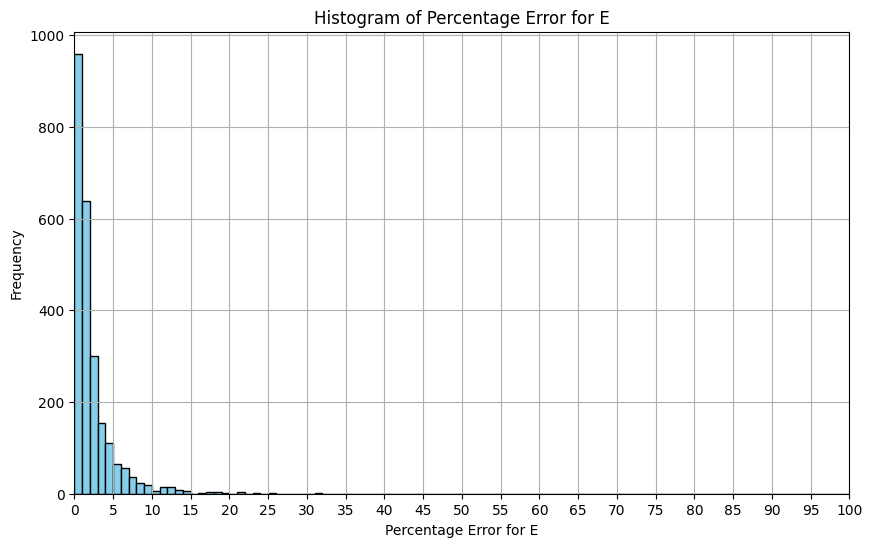

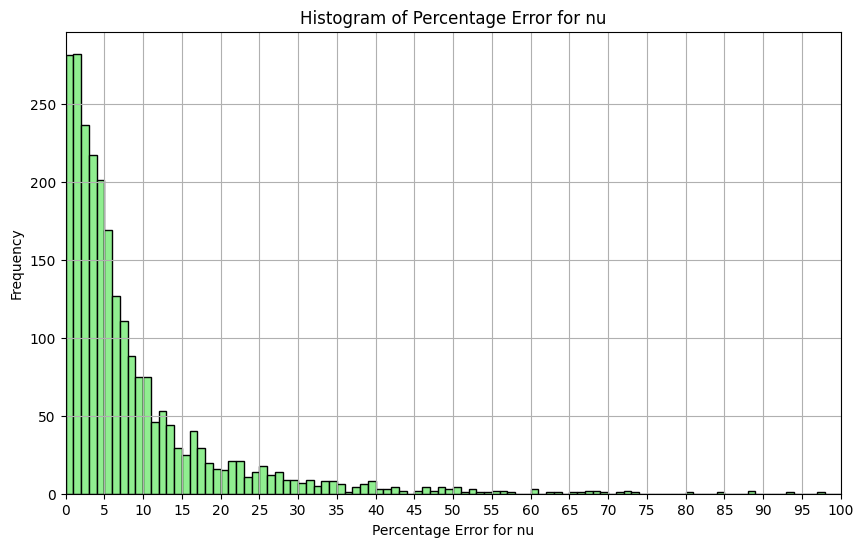

Maximum Percentage Error for E: 31.510411797848548
Minimum Percentage Error for E: 0.0012912713403418579
Maximum Percentage Error for mu: 101.44862054989039
Minimum Percentage Error for mu: 0.00732788352466169


In [ ]:
import matplotlib.pyplot as plt



print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'ceramics_xgb_no_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('ceramics_xgb_no_scale_merge.pkl')

## **Scaled**

---



In [ ]:
# Assuming dataf is your DataFrame
data['E'] *= 10
data['nu'] *= 10000
X = data[['rho','a','b','c', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'nu']]
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
Y

E      nu
0       8867.32  3480.0
1       5592.65  2920.0
2       8979.91  2110.0
3       8872.02  1550.0
4       5978.69  2680.0
...         ...     ...
243438  3147.16  2350.0
243439  2626.72  1500.0
243440  1387.51  3570.0
243441  6420.02  3460.0
243442  2178.37  2740.0

[243443 rows x 2 columns]

In [ ]:
xgb_model = XGBRegressor(n_estimators=100000, random_state=42, learning_rate=0.004)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 22942.76745662088
Mean Squared Error for mu: 150647.80192855845


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
results_df['Actual_E'] /= 10
results_df['Predicted_E'] /= 10
results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(results_df)

Mean Absolute Error for E: 10.461938794095706
Mean Absolute Error for mu: 0.025793718151429352
Standard Deviation for E: 10.955583176394606
Standard Deviation for mu: 0.029008752327406167
Mean Absolute percentage Error for E: 2.4437359895694595
Mean Absolute percentage Error for mu: 9.827717582634925
Mode Percentage Error for E: ModeResult(mode=1.0, count=731) 
Mode Percentage Error for E: ModeResult(mode=0.3, count=37) 
      Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      798.060   792.728027   5.331973      0.362      0.360915  0.001085   
1      446.854   456.207672   9.353666      0.424      0.383608  0.040392   
2      754.042   752.863281   1.178719      0.177      0.192552  0.015552   
3      287.266   287.359619   0.093619      0.328      0.285521  0.042479   
4      383.245   372.186005  11.058989      0.274      0.270819  0.003181   
...        ...          ...        ...        ...           ...       ...   
2430   577.081   592.506226  15.4252

Median Percentage Error for E: 1.5543108847491822
Median Percentage Error for mu: 5.71701082904013
Mean Absolute Error for E: 10.461938794095706
Mean Absolute Error for mu: 0.025793718151429352
Standard Deviation for E: 10.955583176394606
Standard Deviation for mu: 0.029008752327406167


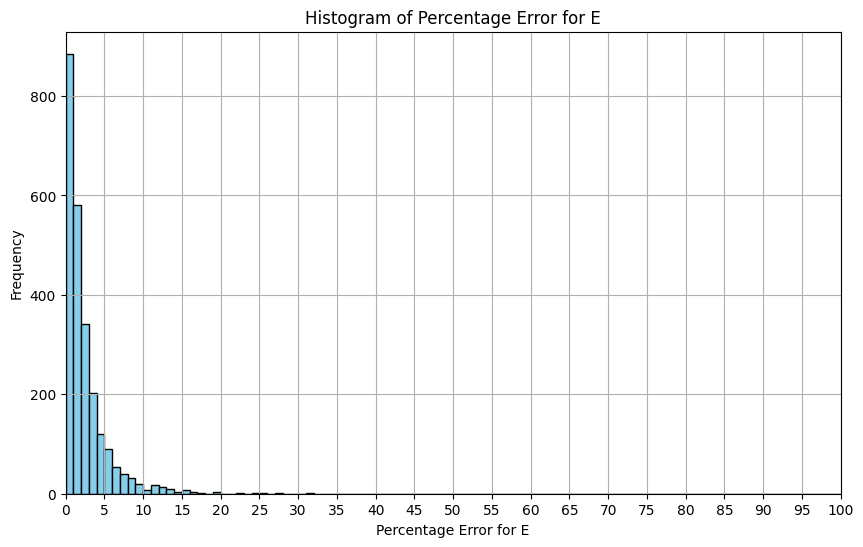

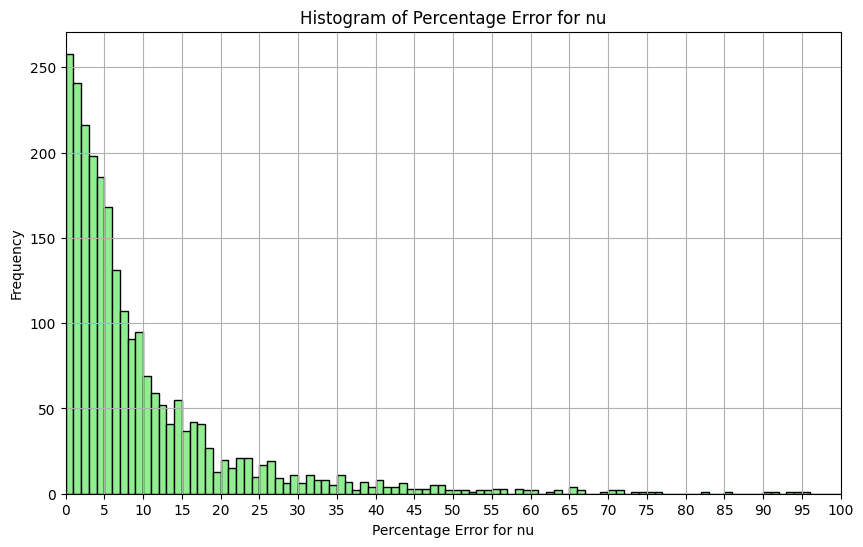

Maximum Percentage Error for E: 31.773869666255766
Minimum Percentage Error for E: 0.00018966000985819997
Maximum Percentage Error for mu: 95.32635619308775
Minimum Percentage Error for mu: 0.005215362852990033


In [ ]:
import matplotlib.pyplot as plt

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'ceramics_xgb_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('ceramics_xgb_scale_merge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **only nu scaled**

In [ ]:
# X = data[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
# Y = data[['E', 'mu']]

# # Assuming dataf is your DataFrame
data['E'] /= 10
# data['mu'] *= 10000
X = data[['rho','a','b','c', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'nu']]
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
data

rho        E     nu  a  b   c        f1            f2  \
0       13962.467  88.6732  0.348  1  2   8  0.000000  0.000000e+00   
1        5719.151  55.9265  0.292  1  2   8  0.000000  3.200000e-08   
2       12856.172  89.7991  0.211  1  2   8  0.000000  0.000000e+00   
3       10157.064  88.7202  0.155  1  2   8  0.000000  4.020000e-08   
4        3329.859  59.7869  0.268  1  2   8  0.000000  0.000000e+00   
...           ...      ...    ... .. ..  ..       ...           ...   
243438   2151.352  31.4716  0.235  4  9  10  0.634691  6.893482e-01   
243439  11170.836  26.2672  0.150  4  9  10  0.971221  9.735789e-01   
243440   6081.633  13.8751  0.357  4  9  10  0.973872  9.767765e-01   
243441   5484.809  64.2002  0.346  4  9  10  0.766417  7.933862e-01   
243442   3428.839  21.7837  0.274  4  9  10  0.915828  9.183564e-01   

                  f3            f4  ...       f21       f22       f23  \
0       0.000000e+00  9.520000e-08  ...  1.178788  1.274758  1.301000   
1       1.700000e-07  1.509996e-01  ...  1.644547  1.671376  1.675845   
2       6.480000e-08  1.520000e-07  ...  1.386432  1.402239  1.418806   
3       3.440000e-07  1.428715e-01  ...  1.574311  1.590799  1.632687   
4       0.000000e+00  0.000000e+00  ...  1.886973  2.028108  2.188986   
...              ...           ...  ...       ...       ...       ...   
243438  7.098019e-01  7.271838e-01  ...  1.116373  1.119968  1.127262   
243439  9.739448e-01  9.806567e-01  ...  1.008659  1.009808  1.011955   
243440  9.793068e-01  9.794873e-01  ...  1.012154  1.013722  1.013948   
243441  8.143778e-01  8.541225e-01  ...  1.075146  1.092821  1.100294   
243442  9.279056e-01  9.308893e-01  ...  1.037708  1.040815  1.041349   

             f24       f25       f26       f27       f28       f29       f30  
0       1.341759  1.362914  1.413474  1.436410  1.456206  1.461950  1.559695  
1       1.778290  1.802126  1.808714  1.809264  1.965531  1.981258  1.983373  
2       1.429915  1.524776  1.528230  1.530265  1.564059  1.682047  1.700771  
3       1.711357  1.712117  1.729015  1.778845  1.889687  1.934818  1.945951  
4       2.246763  2.263122  2.268006  2.423228  2.441292  2.450231  2.467057  
...          ...       ...       ...       ...       ...       ...       ...  
243438  1.133800  1.169416  1.177023  1.190304  1.221393  1.239906  1.264598  
243439  1.013167  1.017090  1.018890  1.019697  1.029475  1.029858  1.030280  
243440  1.016369  1.016478  1.017463  1.017641  1.021023  1.026127  1.026616  
243441  1.100404  1.132304  1.139402  1.152279  1.166639  1.179414  1.190321  
243442  1.046677  1.048012  1.057841  1.061120  1.067900  1.075832  1.078359  

[243443 rows x 36 columns]

In [ ]:
y_test

array([[79.806 ,  0.362 ],
       [44.6854,  0.424 ],
       [75.4042,  0.177 ],
       ...,
       [29.9164,  0.228 ],
       [80.2334,  0.282 ],
       [86.9304,  0.168 ]])

In [ ]:
xgb_model = XGBRegressor(n_estimators=150000, random_state=42, learning_rate=0.004)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 1.97380229846125
Mean Squared Error for mu: 0.0012968263049172742


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(results_df)

Mean Absolute Error for E: 0.9510262979298305
Mean Absolute Error for mu: 2.323125307148731e-06
Standard Deviation for E: 1.034306829799569
Standard Deviation for mu: 2.752174143960223e-06
Mean Absolute percentage Error for E: 2.261489179481618
Mean Absolute percentage Error for mu: 8.804392954492958
Mode Percentage Error for E: ModeResult(mode=1.0, count=809) 
Mode Percentage Error for E: ModeResult(mode=1.6, count=39) 
      Actual_E  Predicted_E   Error_E  Actual_mu  Predicted_mu      Error_mu  \
0      79.8060    79.654312  0.151688   0.000036      0.000036  8.785312e-08   
1      44.6854    45.894783  1.209383   0.000042      0.000036  6.110803e-06   
2      75.4042    75.409409  0.005209   0.000018      0.000018  5.953760e-07   
3      28.7266    28.902533  0.175933   0.000033      0.000028  5.199387e-06   
4      38.3245    37.161823  1.162677   0.000027      0.000028  7.595379e-07   
...        ...          ...       ...        ...           ...           ...   
2430   57.7081 

Median Percentage Error for E: 1.3435893089630258
Median Percentage Error for mu: 4.963520298833432
Mean Absolute Error for E: 0.9510262979298305
Mean Absolute Error for mu: 2.323125307148731e-06
Standard Deviation for E: 1.034306829799569
Standard Deviation for mu: 2.752174143960223e-06


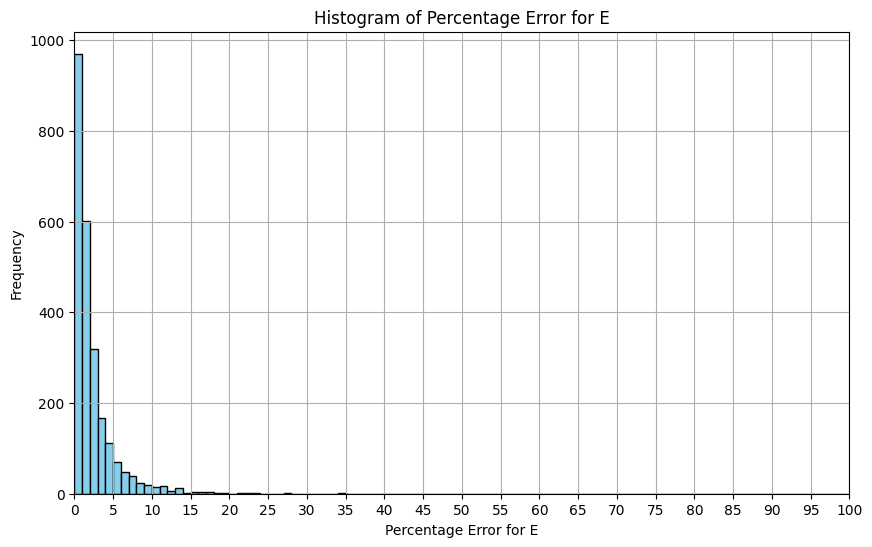

Maximum Percentage Error for E: 34.321753239970334
Minimum Percentage Error for E: 2.349557835157063e-05
Maximum Percentage Error for mu: 100.02201199531558
Minimum Percentage Error for mu: 0.0011675670498729096


In [ ]:
import matplotlib.pyplot as plt

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'ceramics_xgb_nu_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('ceramics_xgb_nu_scale_merge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>